In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy import special

This code will show estimations of what serrodyne modulation sidebands would look like using similar approaches to finding sidebands in other files.

However, instead of driving a sawtooth, I am looking to see what considering only the first few terms in the Fourier series would do since our EOM has a bandwidth.

In [9]:
#ignoring any desired transitions, looking purely at the modulation of a beam:

#The frequencies we are modulating at are different harmonics:
wm = 2       #this is the frequency of the first harmonic
N = 3          #this is the number of harmonics we wish to use

W = []          #W is a list of all of the frequencies we will be modulating at
for n in range(1,N+1):
    W.append(- wm * n)

ModZero = 1.8   #This is a guess as to what the modulation index should be
Indices = []    #Following the Fourier series expansion of the sawtooth waveform, the amplitude of the modulation index should be halved each time:
for n in range(1,N+1):
    Indices.append(ModZero / n)

Order = 3     #Considering up to this order

In [16]:
#work out the amplitude for each frequency:
values = range(-Order, Order + 1)  # from -Order to Order

Orders = []
NumberOfPlots = 0   #this is the number of sets of indices in Orders
for p in itertools.product(values, repeat = np.size(W)):        #intertools produces all possible combinations of elements
    NumberOfPlots += 1
    Orders.append(p)

#Use the same function as before to find the powers at different frequencies
def FreqAndPower(Orders,ModIndices):

    Freq = 0
    for i in range(0, np.size(Orders)):
        Freq += int(Orders[i] * W[i])

    Amp = 1
    for x in range(np.size(ModIndices)):
        Amp *= special.jv(Orders[x], ModIndices[x])
    Power = Amp**2
    return(Freq,Power)

#find the freqs and 
Frequencies , Powers = [] , []
for i in range(0, NumberOfPlots):
    Ftemp, Powertemp = FreqAndPower(Orders[i],Indices)
    Frequencies.append(Ftemp)
    Powers.append(Powertemp)

#plot the first order seperately
index = Powers.index(max(Powers))
F = Frequencies[index]
print(F)
print(max(Powers))

2
0.18341283652770715


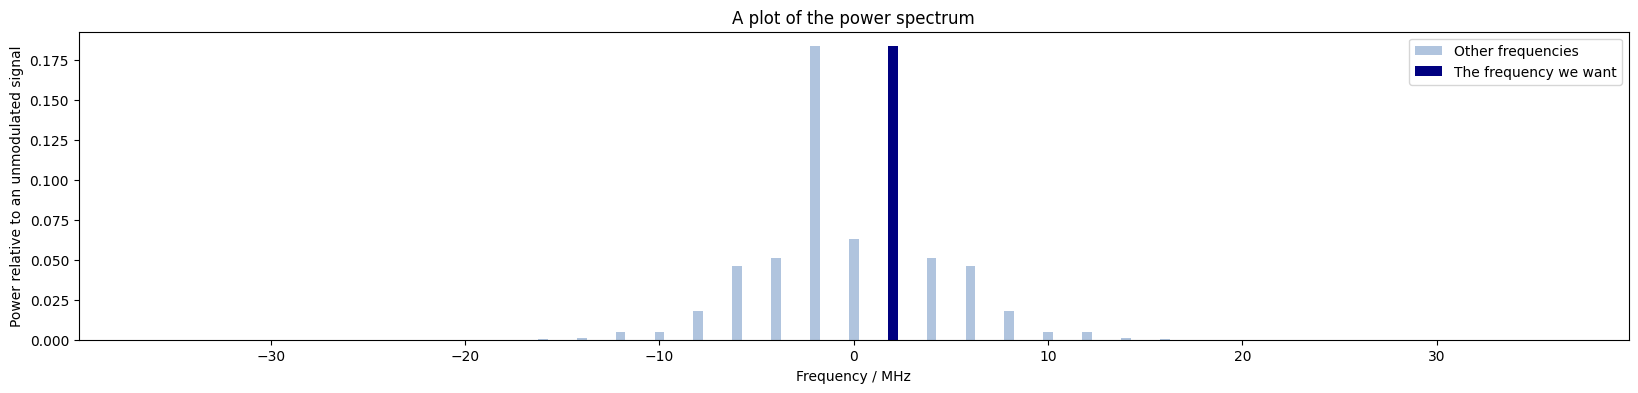

In [17]:
#plot th power spectrum
plt.figure(figsize=(20,4))
plt.bar(Frequencies, Powers,width=0.5, color='lightsteelblue', label = 'Other frequencies')
plt.bar(F, P, width =0.5, color = 'navy', label = 'The frequency we want')

plt.legend()
plt.xlabel('Frequency / MHz')
plt.ylabel('Power relative to an unmodulated signal')
plt.title('A plot of the power spectrum')
plt.show()